<a href="https://colab.research.google.com/github/nishminavi/APS4022/blob/main/Navi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded Excel file to check its contents
excel_path = "/content/presentation.xlsx"
xls = pd.ExcelFile(excel_path)

# List all sheet names to understand the structure
sheet_names = xls.sheet_names
sheet_names

FileNotFoundError: [Errno 2] No such file or directory: '/content/APS 4022 Class Assignment.xlsx'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the data from the first sheet
df = xls.parse('Sheet1')

# Display the first few rows and data types
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  73 non-null     object
 1   Unnamed: 1  65 non-null     object
 2   Unnamed: 2  72 non-null     object
 3   Unnamed: 3  71 non-null     object
dtypes: object(4)
memory usage: 2.5+ KB


(         Unnamed: 0   Unnamed: 1 Unnamed: 2     Unnamed: 3
 0  CLASS ASSIGNMENT          NaN        NaN            NaN
 1               NaN          NaN        NaN            NaN
 2               No.  Male/Female  HEIGHT/CM  ARM LEGNTH/CM
 3                 1       Female      125.3          60.96
 4                 2         male     173 cm           75cm,
 None)

In [ ]:
# Extract data starting from row 3 (index 2), and reset headers accordingly
df_clean = xls.parse('Sheet1', skiprows=3)
df_clean.columns = ['No', 'Gender', 'Height_cm', 'Arm_Length_cm']

# Drop rows with missing values in essential columns
df_clean.dropna(subset=['Gender', 'Height_cm', 'Arm_Length_cm'], inplace=True)

# Clean height and arm length columns (remove 'cm', convert to float)
df_clean['Height_cm'] = df_clean['Height_cm'].astype(str).str.replace("cm", "", case=False).str.strip()
df_clean['Arm_Length_cm'] = df_clean['Arm_Length_cm'].astype(str).str.replace("cm", "", case=False).str.strip()

df_clean['Height_cm'] = pd.to_numeric(df_clean['Height_cm'], errors='coerce')
df_clean['Arm_Length_cm'] = pd.to_numeric(df_clean['Arm_Length_cm'], errors='coerce')

# Standardize gender entries
df_clean['Gender'] = df_clean['Gender'].str.strip().str.capitalize()

# Drop rows with conversion errors
df_clean.dropna(inplace=True)

# Show cleaned data summary
df_clean.head()


,No,Gender,Height_cm,Arm_Length_cm
0,1,Female,125.3,60.96
1,2,Male,173.0,75.00
2,3,Male,164.0,74.00
3,4,Male,160.0,74.00
4,5,Female,145.0,65.00


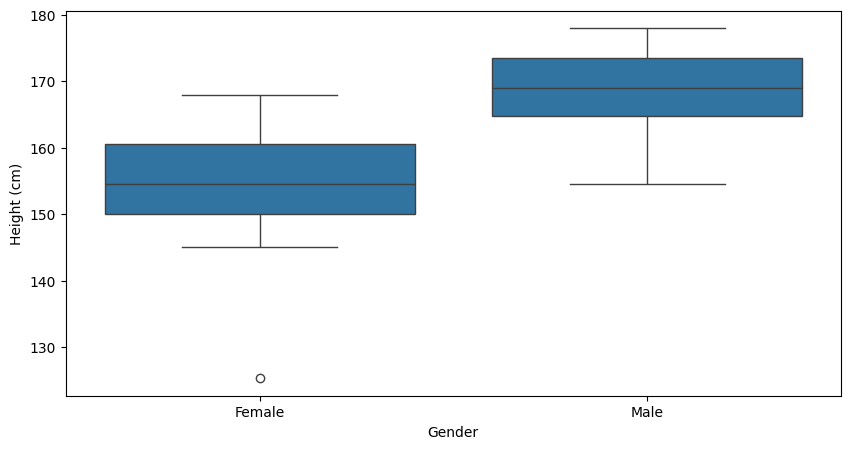

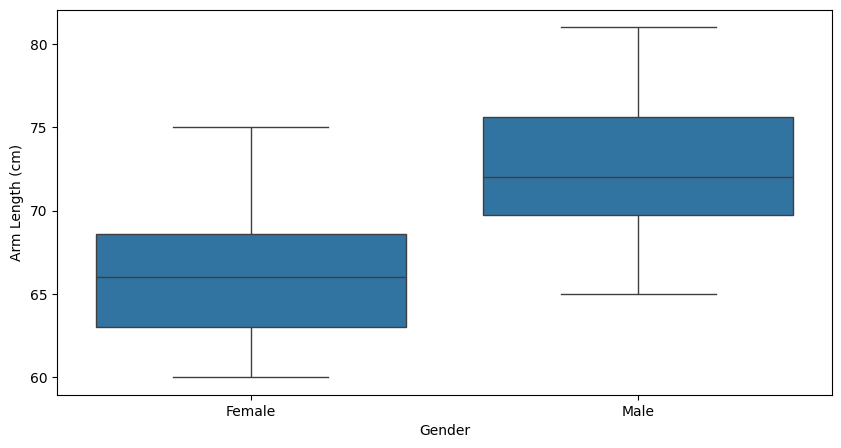

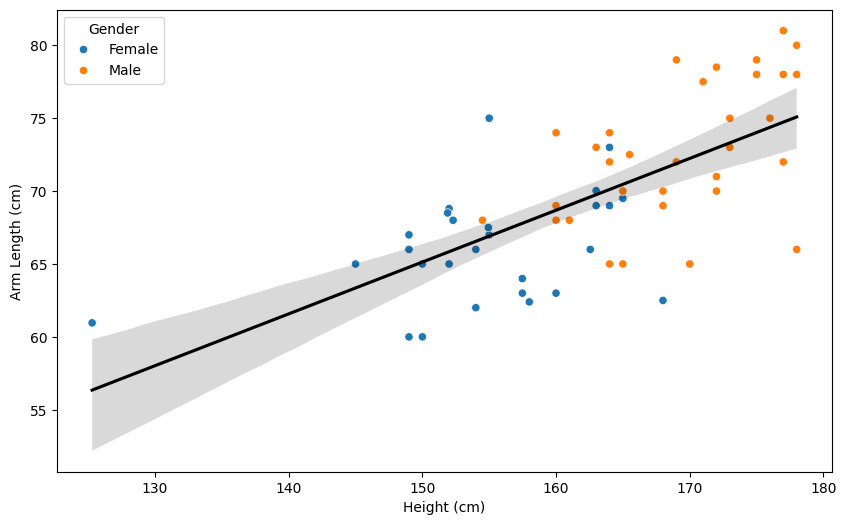

Average values by gender:
          Height_cm  Arm_Length_cm
Gender                           
Female  154.641071      66.042500
Male    168.916667      72.430556

Correlation: 0.6853824586047071


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the data
df = pd.read_excel("APS 4022 Class Assignment.xlsx", skiprows=3)
df.columns = ['No', 'Gender', 'Height_cm', 'Arm_Length_cm']
df.dropna(subset=['Gender', 'Height_cm', 'Arm_Length_cm'], inplace=True)

df['Height_cm'] = df['Height_cm'].astype(str).str.replace("cm", "", case=False).str.strip()
df['Arm_Length_cm'] = df['Arm_Length_cm'].astype(str).str.replace("cm", "", case=False).str.strip()
df['Height_cm'] = pd.to_numeric(df['Height_cm'], errors='coerce')
df['Arm_Length_cm'] = pd.to_numeric(df['Arm_Length_cm'], errors='coerce')
df['Gender'] = df['Gender'].str.strip().str.capitalize()
df.dropna(inplace=True)

# Plot 1: Height and Arm Length distribution by Gender
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Gender', y='Height_cm')
plt.ylabel('Height (cm)')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Gender', y='Arm_Length_cm')
plt.ylabel('Arm Length (cm)')
plt.show()

# Plot 2: Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Height_cm', y='Arm_Length_cm', hue='Gender')
sns.regplot(data=df, x='Height_cm', y='Arm_Length_cm', scatter=False, color='black')
plt.xlabel('Height (cm)')
plt.ylabel('Arm Length (cm)')
plt.show()

# Print summary stats
print("Average values by gender:\n", df.groupby("Gender")[["Height_cm", "Arm_Length_cm"]].mean())
print("\nCorrelation:", df["Height_cm"].corr(df["Arm_Length_cm"]))
